In [1]:
from ultralytics import YOLO

model = YOLO("yolo26n.pt")
print(model.names)

{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microw


0: 384x640 (no detections), 15.1ms
Speed: 1.5ms preprocess, 15.1ms inference, 9.7ms postprocess per image at shape (1, 3, 384, 640)


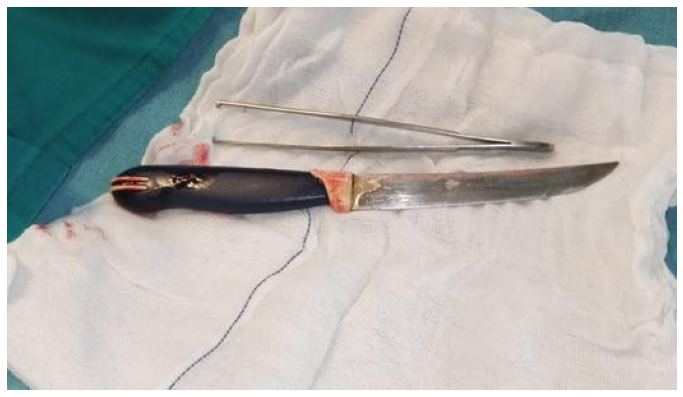

In [1]:
# Step 1: Import libraries
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Step 2: Load YOLO v26 model
model = YOLO("yolo26n.pt")  # If model not downloaded, YOLO will download automatically

# Step 3: Define dangerous classes for hospital safety
dangerous_classes = ["knife", "scissors"]  # Add more classes if needed

# Step 4: Load image
image_path = "test1.jpg"  # Put your image path here
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Step 5: Run inference
results = model(img)

# Step 6: Draw bounding boxes on dangerous objects
# Step 6: Draw bounding boxes on dangerous objects
for r in results:
    boxes = r.boxes
    class_ids = r.boxes.cls.cpu().numpy().astype(int)
    for i, cls_id in enumerate(class_ids):
        cls_name = model.names[cls_id]
        if cls_name in dangerous_classes:
            # Fix: remove [0] because xyxy[i] already shape (4,)
            x1, y1, x2, y2 = boxes.xyxy[i].cpu().numpy().astype(int)
            cv2.rectangle(img, (x1, y1), (x2, y2), (255,0,0), 2)  # Red box
            cv2.putText(img, f"{cls_name} unsafe", (x1, y1-10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,0,0), 2)


# Step 7: Display image
plt.figure(figsize=(12,8))
plt.imshow(img)
plt.axis("off")
plt.show()
